С помощью немного измененного первого задания вытащили id подписчиков otus

In [19]:
SCRAPPED_FILE = 'ids2.txt'

In [20]:
url_0 = ''

In [21]:
url_1 = ''

In [22]:
import json
import logging

import requests
from scrapper.storages.file_storage import FileStorage
from scrapper.scrappers.scrapper import Scrapper
import time

In [123]:
def scrap_process(storage, urls, path):
        text_array=[]
        headers = {
            'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.9; rv:45.0) Gecko/20100101 Firefox/45.0'
        }
        i = 0
        for url in urls:
            print(i)
            i=i+1
            response = requests.get(url=url, headers=headers)
            if not response.ok or 'error' in response.text:
                print('retry')
                time.sleep(10)
                response = requests.get(url=url, headers=headers)
                if not response.ok  or 'error' in response.text:
                    print(response.text)
                    time.sleep(10)
                else:
                    text_array.append(response.json())

            # then continue process, or retry, or fix your code
        
            else:
#                print(response.json())
                text_array.append(response.json())
        time.sleep(1)
        storage.write_data([json.dumps(text_array)])

In [ ]:
storage = FileStorage(SCRAPPED_FILE)

scrap_process(storage, [url_0,url_1], None)

In [78]:
ids = []
f = open("ids2.txt", "r")
lines = f.read()
array_json = json.loads(lines)
for row in array_json:
    ids.extend(array_json[0]['response']['items'])
print(len(ids))

2000


In [79]:
SCRAPPED_FILE = 'info.txt'

In [80]:
url2 = ''

In [81]:
ids_text = list(map(str, ids))

In [82]:
url2_with_id = url2.format(','.join(ids_text[:100]))

In [83]:
url2_with_id_list = []

In [84]:
for i in range(20):
    url2_with_id = url2.format(','.join(ids_text[i*100:i*100+100]))
    url2_with_id_list.append(url2_with_id)

In [99]:
storage = FileStorage(SCRAPPED_FILE)

scrap_process(storage, url2_with_id_list, None)

In [100]:
from scrapper.parsers.filter_parser import FilterParser
from scrapper.parsers.json_parser import JsonParser

In [101]:
columns = ['id', 'sex','city.title', 'country.title', 'bdate', 'about']
filter_parser = FilterParser(columns)
json_parser = JsonParser(filter_parser)


In [102]:
import pandas as pd

In [103]:
SCRAPPED_FILE

'info.txt'

In [104]:
def parse(data_file, filters):
        rows = []
        for line in data_file.read_data():
            array_json = json.loads(line)
            for responce in array_json:
                for news in responce['response']:
                    row = filters.parse(news)
                    rows.append(row)
        return rows

In [105]:
storage = FileStorage(SCRAPPED_FILE)
parsed_data = parse(storage, filter_parser)
df = pd.DataFrame(data=parsed_data, columns=columns)
df.to_csv('info.csv')    

найдем кте, где указан год

In [207]:
import pandas as pd

In [208]:
df = pd.read_csv('info.csv')

In [209]:
df.head(1)

,Unnamed: 0,id,sex,city.title,country.title,bdate,about
0,0,255,2,Санкт-Петербург,Россия,3.7.1985,NaN


In [109]:
with_bd = df['bdate'].str.contains('\.[0-9]{4}')

In [110]:
with_bd.fillna(False, inplace=True)

In [111]:
df_bd = df[with_bd]

In [112]:
df_bd.shape

(804, 7)

In [114]:
df_bd.head(1)

,Unnamed: 0,id,sex,city.title,country.title,bdate,about
0,0,255,2,Санкт-Петербург,Россия,3.7.1985,NaN


In [115]:
ids = df_bd['id'].tolist()

In [116]:
len(ids)

804

In [117]:
ids[0]

255

In [118]:
url_wall=''

In [119]:
urls = []
for id in ids:
    urls.append(url_wall.format(str(id)))

In [124]:
storage = FileStorage('wall')

scrap_process(storage, urls, None)

0
1
2
3
4
5
retry
{"error":{"error_code":30,"error_msg":"This profile is private","request_params":[{"key":"oauth","value":"1"},{"key":"method","value":"wall.get"},{"key":"owner_id","value":"80031"},{"key":"v","value":"5.92"}]}}
6
7
8
9
10
retry
{"error":{"error_code":30,"error_msg":"This profile is private","request_params":[{"key":"oauth","value":"1"},{"key":"method","value":"wall.get"},{"key":"owner_id","value":"171605"},{"key":"v","value":"5.92"}]}}
11
12
13
14
15
retry
{"error":{"error_code":30,"error_msg":"This profile is private","request_params":[{"key":"oauth","value":"1"},{"key":"method","value":"wall.get"},{"key":"owner_id","value":"247814"},{"key":"v","value":"5.92"}]}}
16
17
18
19
20
21
22
23
24
25
26
retry
{"error":{"error_code":30,"error_msg":"This profile is private","request_params":[{"key":"oauth","value":"1"},{"key":"method","value":"wall.get"},{"key":"owner_id","value":"458827"},{"key":"v","value":"5.92"}]}}
27
28
29
30
31
32
33
retry
{"error":{"error_code":30,"erro

In [137]:
def parse(data_file, filters):
        rows = []
        for line in data_file.read_data():
            array_json = json.loads(line)
            for responce in array_json:

                for news in responce['response']['items']:
                    row = filters.parse(news)
                    rows.append(row)
        return rows

In [138]:
columns = ['owner_id', 'text']
filter_parser = FilterParser(columns)
json_parser = JsonParser(filter_parser)

storage = FileStorage('wall')
parsed_data = parse(storage, filter_parser)
df = pd.DataFrame(data=parsed_data, columns=columns)
df.to_csv('wall.csv')    

Посмотрим сколько есть заполненных id

In [163]:
df_wall = pd.read_csv('wall.csv')

In [164]:
df_wall.head(1)

,Unnamed: 0,owner_id,text
0,0,255,😱


In [165]:
df_wall['owner_id'].unique().shape

(340,)

In [166]:
df_wall.dropna(subset=['text'], inplace = True)

In [167]:
df_wall.shape

(4332, 3)

In [150]:
df_wall['owner_id'].unique().shape

(303,)

Теперь у нас 303 записи

In [153]:
df_bd.head(1)

,Unnamed: 0,id,sex,city.title,country.title,bdate,about
0,0,255,2,Санкт-Петербург,Россия,3.7.1985,NaN


In [154]:
df_info = df_bd[df_bd['id'].isin(df_wall['owner_id'].unique())]

In [156]:
df_info.shape

(606, 7)

In [157]:
df_info.drop_duplicates(subset=['id'], inplace =True)

C:\javasdk\anakonda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [159]:
df_info.shape

(303, 7)

In [160]:
df_wall.head(1)

,Unnamed: 0,owner_id,text
0,0,255,😱


In [172]:
df_wall.drop_duplicates(subset=['text', 'owner_id'], inplace =True)

In [173]:
df_wall.shape

(2127, 3)

In [175]:
df_wall['text'].unique().shape

(2094,)

In [176]:
df_wall['owner_id'].unique().shape

(303,)

Теперь подготовим пол и возраст, чтобы определиться, что мы будем предсказывать

In [177]:
df_info.head(1)

,Unnamed: 0,id,sex,city.title,country.title,bdate,about
0,0,255,2,Санкт-Петербург,Россия,3.7.1985,NaN


In [180]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 999
Data columns (total 7 columns):
Unnamed: 0       303 non-null int64
id               303 non-null int64
sex              303 non-null int64
city.title       284 non-null object
country.title    294 non-null object
bdate            303 non-null object
about            39 non-null object
dtypes: int64(3), object(4)
memory usage: 18.9+ KB


Закодируем пол как число

In [181]:
df_info['sex'] = df_info['sex'].astype(int)

C:\javasdk\anakonda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [182]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 999
Data columns (total 7 columns):
Unnamed: 0       303 non-null int64
id               303 non-null int64
sex              303 non-null int32
city.title       284 non-null object
country.title    294 non-null object
bdate            303 non-null object
about            39 non-null object
dtypes: int32(1), int64(2), object(4)
memory usage: 17.8+ KB


теперь год

In [190]:
df_info['bdate'] = df_info['bdate'].str.slice(-4).astype(int)

C:\javasdk\anakonda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [191]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 999
Data columns (total 7 columns):
Unnamed: 0       303 non-null int64
id               303 non-null int64
sex              303 non-null int32
city.title       284 non-null object
country.title    294 non-null object
bdate            303 non-null int32
about            39 non-null object
dtypes: int32(2), int64(2), object(3)
memory usage: 16.6+ KB


In [195]:
df_info.head(1)

,Unnamed: 0,id,sex,city.title,country.title,bdate,about
0,0,255,2,Санкт-Петербург,Россия,1985,NaN


In [196]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\javasdk\anakonda\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


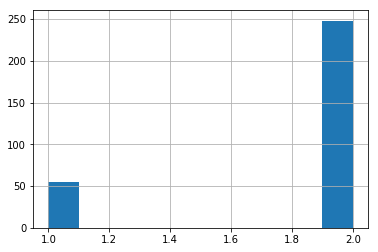

In [197]:
df_info['sex'].hist()

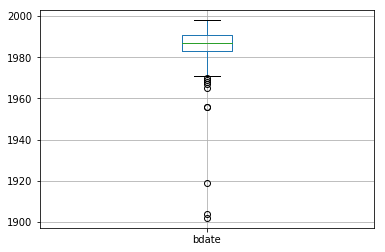

In [201]:
df_info.boxplot(column=['bdate'])

In [203]:
df_info.describe()

,Unnamed: 0,id,sex,bdate
count,303.000000,3.030000e+02,303.000000,303.000000
mean,505.211221,1.008508e+07,1.818482,1985.778878
std,289.176740,9.182631e+06,0.386085,10.014259
min,0.000000,2.550000e+02,1.000000,1902.000000
25%,248.000000,2.404987e+06,2.000000,1983.000000
50%,510.000000,7.046133e+06,2.000000,1987.000000
75%,762.500000,1.596742e+07,2.000000,1991.000000
max,999.000000,3.475946e+07,2.000000,1998.000000


(array([ 2.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  2.,  0.,  0.,  1.,  3.,  4.,  5., 10., 27., 57.,
        66., 63., 45., 17.]),
 array([1902. , 1905.2, 1908.4, 1911.6, 1914.8, 1918. , 1921.2, 1924.4,
        1927.6, 1930.8, 1934. , 1937.2, 1940.4, 1943.6, 1946.8, 1950. ,
        1953.2, 1956.4, 1959.6, 1962.8, 1966. , 1969.2, 1972.4, 1975.6,
        1978.8, 1982. , 1985.2, 1988.4, 1991.6, 1994.8, 1998. ]),
 <a list of 30 Patch objects>)

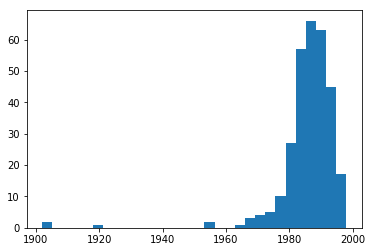

In [213]:
plt.hist(df_info['bdate'], bins=30)

In [214]:
df_info[df_info['bdate']<1965]=1965

C:\javasdk\anakonda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\javasdk\anakonda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


(array([ 6.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  1.,  2.,  6.,  4.,  8.,
        11.,  8.,  8., 15., 15., 19., 19., 47., 25., 20., 18., 13., 17.,
        15.,  7.,  3.,  7.]),
 array([1965. , 1966.1, 1967.2, 1968.3, 1969.4, 1970.5, 1971.6, 1972.7,
        1973.8, 1974.9, 1976. , 1977.1, 1978.2, 1979.3, 1980.4, 1981.5,
        1982.6, 1983.7, 1984.8, 1985.9, 1987. , 1988.1, 1989.2, 1990.3,
        1991.4, 1992.5, 1993.6, 1994.7, 1995.8, 1996.9, 1998. ]),
 <a list of 30 Patch objects>)

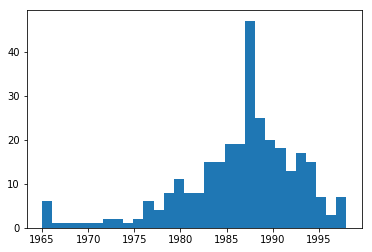

In [216]:
plt.hist(df_info['bdate'], bins=30)

In [217]:
df_info.describe()

,Unnamed: 0,id,sex,bdate
count,303.000000,3.030000e+02,303.000000,303.000000
mean,529.297030,9.887154e+06,34.214521,1986.399340
std,340.761123,9.145966e+06,250.512409,6.404851
min,0.000000,2.550000e+02,1.000000,1965.000000
25%,262.000000,2.305040e+06,2.000000,1983.000000
50%,522.000000,6.626119e+06,2.000000,1987.000000
75%,766.500000,1.580976e+07,2.000000,1991.000000
max,1965.000000,3.475946e+07,1965.000000,1998.000000


Разобьем возраст на 4 группы - 1965,1983,1987, 1991, 1998 и попробуем их предсказать

In [221]:
df_info['start_date'] = pd.qcut(df_info['bdate'], 4, labels=[1983, 1987, 1991, 1998])

C:\javasdk\anakonda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [222]:
df_info.head(1)

,Unnamed: 0,id,sex,city.title,country.title,bdate,about,start_date
0,0,255,2,Санкт-Петербург,Россия,1985,NaN,1987


In [223]:
df_wall.head(1)

,Unnamed: 0,owner_id,text
0,0,255,😱


In [225]:
gb_wall = df_wall.groupby('owner_id')

In [226]:
gb_agr = gb_wall.agg(lambda col: ' '.join(col))

In [234]:
gb_agr.reset_index(inplace=True)

In [235]:
gb_agr.head(1)

,owner_id,text
0,255,"😱 - Доктор, что у меня? \r\n- У вас прогресси..."


In [236]:
df_work = pd.merge(df_info, gb_agr, how='left', left_on=['id'], right_on=['owner_id'])

In [237]:
df_work.head(1)

,Unnamed: 0,id,sex,city.title,country.title,bdate,about,start_date,owner_id,text
0,0,255,2,Санкт-Петербург,Россия,1985,NaN,1987,255.0,"😱 - Доктор, что у меня? \r\n- У вас прогресси..."


In [240]:
df_work['city.title'].fillna('NONE', inplace =True)

In [241]:
df_work['country.title'].fillna('NONE', inplace =True)

In [242]:
df_work.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 10 columns):
Unnamed: 0       303 non-null int64
id               303 non-null int64
sex              303 non-null int32
city.title       303 non-null object
country.title    303 non-null object
bdate            303 non-null int32
about            44 non-null object
start_date       303 non-null category
owner_id         298 non-null float64
text             298 non-null object
dtypes: category(1), float64(1), int32(2), int64(2), object(4)
memory usage: 21.8+ KB


In [243]:
df_work['city.title'].unique()

array(['Санкт-Петербург', 'Москва', 'Алматы', 1965, 'Великий Новгород',
       'Самара', 'Томск', 'Севастополь', 'Донецк', 'Казань',
       'Нижний Новгород', 'Калининград', 'Красноярск', 'Волгодонск',
       'NONE', 'Екатеринбург', 'Ижевск', 'Тюмень', 'Брянск', 'Глазов',
       'Тольятти', 'Ставрополь', 'Ярославль', 'Уфа', 'Астана',
       'Петрозаводск', 'Челябинск', 'Сургут', 'Курган', 'Киров',
       'Раменское', 'Новосибирск', 'Кемерово', 'Ростов-на-Дону',
       'Киляковка', 'Владивосток', 'Chittagong', 'Таганрог', 'Смоленск',
       'Новочеркасск', 'Киев', 'Оренбург', 'Кострома', 'Гродно',
       'Чебоксары', 'Рязань', 'Заокский', 'Подольск', 'Старый Оскол',
       'Kladno', 'Белгород', 'Краснодар', 'Омск', 'Минск', 'Абакан',
       'Иркутск', 'Магнитогорск', 'Камышлов', 'Вологда', 'Дмитров',
       'Пушное', 'Волжский', 'Воронеж', 'Пенза', 'Касимов', 'Улан-Удэ',
       'Вольск', 'Пермь', 'Кичменгский Городок', 'Керчь', 'Барнаул',
       'New York City', 'Городищи', 'Калуга', 'Д

In [244]:
df_work['country.title'].unique()

array(['Россия', 'Казахстан', 1965, 'Украина', 'NONE', 'Бангладеш',
       'Беларусь', 'Чехия', 'США', 'Китай'], dtype=object)

In [245]:
df_work.to_csv('work.csv')

In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('work.csv')

In [3]:
df.head(1)

,Unnamed: 0,Unnamed: 0.1,id,sex,city.title,country.title,bdate,about,start_date,owner_id,text
0,0,0,255,2,Санкт-Петербург,Россия,1985,NaN,1987,255.0,"😱 - Доктор, что у меня? \r\r\n- У вас прогрес..."


переразобьем возраст на 3 категории, так как 4 - много

In [4]:
df['start_date'] = pd.qcut(df['bdate'], 3, labels=[1985, 1989, 1998])

In [5]:
df['start_date'].unique()

[1985, 1989, 1998]
Categories (3, int64): [1985 < 1989 < 1998]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 11 columns):
Unnamed: 0       303 non-null int64
Unnamed: 0.1     303 non-null int64
id               303 non-null int64
sex              303 non-null int64
city.title       303 non-null object
country.title    303 non-null object
bdate            303 non-null int64
about            44 non-null object
start_date       303 non-null category
owner_id         298 non-null float64
text             298 non-null object
dtypes: category(1), float64(1), int64(5), object(4)
memory usage: 24.1+ KB


Пол - уже закодирован, закодируем города как onehotencoding

In [7]:
df.head(1)

,Unnamed: 0,Unnamed: 0.1,id,sex,city.title,country.title,bdate,about,start_date,owner_id,text
0,0,0,255,2,Санкт-Петербург,Россия,1985,NaN,1985,255.0,"😱 - Доктор, что у меня? \r\r\n- У вас прогрес..."


добавим длину текста как параметр

In [8]:
df['text_lenght'] = df['text'].str.len()

In [9]:
df['symbol_count'] = df['text'].str.count(r'[^\w\s]')

In [10]:
df[['text', 'text_lenght', 'symbol_count']].head(1)

,text,text_lenght,symbol_count
0,"😱 - Доктор, что у меня? \r\r\n- У вас прогрес...",726.0,40.0


In [11]:
df['symbol_ratio'] = df['symbol_count']/df['text_lenght']

In [12]:
df[['text', 'text_lenght', 'symbol_count', 'symbol_ratio']].head(1)

,text,text_lenght,symbol_count,symbol_ratio
0,"😱 - Доктор, что у меня? \r\r\n- У вас прогрес...",726.0,40.0,0.055096


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
y_column = 'start_date'

In [15]:
df.head(1)

,Unnamed: 0,Unnamed: 0.1,id,sex,city.title,country.title,bdate,about,start_date,owner_id,text,text_lenght,symbol_count,symbol_ratio
0,0,0,255,2,Санкт-Петербург,Россия,1985,NaN,1985,255.0,"😱 - Доктор, что у меня? \r\r\n- У вас прогрес...",726.0,40.0,0.055096


In [25]:
solve_columns  = ['sex', 'city.title', 'text', 'text_lenght', 'symbol_ratio']

In [27]:
df.dropna(subset=['text'], inplace=True)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df[solve_columns], df[y_column], test_size=0.1, random_state=42)

In [29]:
X_train.shape, X_test.shape

((268, 5), (30, 5))

Сделаем простой baseline

In [30]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 18 to 104
Data columns (total 5 columns):
sex             268 non-null int64
city.title      268 non-null object
text            268 non-null object
text_lenght     268 non-null float64
symbol_ratio    268 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 12.6+ KB


In [33]:
clf = LogisticRegression()
column_trans = ColumnTransformer(
 [('city', OneHotEncoder(handle_unknown = 'ignore'), ['city.title']),  
 ('text', CountVectorizer(), 'text')],
 remainder='drop')
steps = [('column_trans', column_trans), ('clf', clf)]
pipeline = Pipeline(steps)
cv = cross_validate(pipeline, X_train, y_train, scoring='accuracy', cv=5)

C:\javasdk\anakonda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\javasdk\anakonda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\javasdk\anakonda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\javasdk\anakonda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\javasdk\anakonda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

In [36]:
np.mean(cv['test_score'])

0.37417146794505285

попытемся немного улучшить.
1. введем стемизацию

https://stackoverflow.com/questions/47423854/sklearn-adding-lemmatizer-to-countvectorizer

In [58]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string

import nltk
nltk.download('punkt')

stop = set(stopwords.words('russian'))
exclude = set(string.punctuation) 

from nltk.stem.snowball import RussianStemmer


class StemTokenizer(object):
    def __init__(self):
        self.r = RussianStemmer()
    def __call__(self, articles):
        return [self.r.stem(t) for t in word_tokenize(articles)]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kapmik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Протестируем

In [59]:
text = X_train['text'][:1]
text

18    Я только что совершил покупку в Hobby Games и ...
Name: text, dtype: object

In [60]:
StemTokenizer()(text.to_string())

['18',
 'я',
 'тольк',
 'что',
 'соверш',
 'покупк',
 'в',
 'Hobb',
 'Games',
 'и',
 '...']

In [62]:
clf = LogisticRegression()
column_trans = ColumnTransformer(
 [('city', OneHotEncoder(handle_unknown = 'ignore'), ['city.title']),  
 ('text', CountVectorizer(tokenizer=StemTokenizer()), 'text')],
 remainder='drop')
steps = [('column_trans', column_trans), ('clf', clf)]
pipeline = Pipeline(steps)
cv = cross_validate(pipeline, X_train, y_train, scoring='accuracy', cv=5)

C:\javasdk\anakonda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\javasdk\anakonda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\javasdk\anakonda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\javasdk\anakonda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\javasdk\anakonda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

In [63]:
np.mean(cv['test_score'])

0.4217783544198639

О, повысилась точность. Теперь добавим стоп-слова

In [64]:
class StemTokenizer(object):
    def __init__(self):
        self.r = RussianStemmer()
    def __call__(self, articles):
        return [self.r.stem(t) for t in word_tokenize(articles) if t not in stop and t not in exclude]

In [65]:
clf = LogisticRegression()
column_trans = ColumnTransformer(
 [('city', OneHotEncoder(handle_unknown = 'ignore'), ['city.title']),  
 ('text', CountVectorizer(tokenizer=StemTokenizer()), 'text')],
 remainder='drop')
steps = [('column_trans', column_trans), ('clf', clf)]
pipeline = Pipeline(steps)
cv = cross_validate(pipeline, X_train, y_train, scoring='accuracy', cv=5)
np.mean(cv['test_score'])

C:\javasdk\anakonda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\javasdk\anakonda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\javasdk\anakonda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\javasdk\anakonda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\javasdk\anakonda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

0.38039793190736587

Точность упала. Возвращаем старый способ. Добавим 2 и 3 граммы

In [67]:
class StemTokenizer(object):
    def __init__(self):
        self.r = RussianStemmer()
    def __call__(self, articles):
        return [self.r.stem(t) for t in word_tokenize(articles)]

In [70]:
CountVectorizer(tokenizer=StemTokenizer(), ngram_range=(1,3), min_df=5, max_features = 10000).fit_transform(df['text'])

<298x2231 sparse matrix of type '<class 'numpy.int64'>'
	with 27853 stored elements in Compressed Sparse Row format>

In [71]:
clf = LogisticRegression(multi_class ='auto')
column_trans = ColumnTransformer(
 [('city', OneHotEncoder(handle_unknown = 'ignore'), ['city.title']),  
 ('text', CountVectorizer(tokenizer=StemTokenizer(), ngram_range=(1,3), min_df=5, max_features = 10000), 'text')],
 remainder='drop')
steps = [('column_trans', column_trans), ('clf', clf)]
pipeline = Pipeline(steps)
cv = cross_validate(pipeline, X_train, y_train, scoring='accuracy', cv=5)
np.mean(cv['test_score'])

C:\javasdk\anakonda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\javasdk\anakonda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\javasdk\anakonda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\javasdk\anakonda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\javasdk\anakonda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarn

0.44331178255706555

точность немного увеличилась. теперь добавим триграммы символов

In [75]:
clf = LogisticRegression(multi_class ='auto')
column_trans = ColumnTransformer(
 [('city', OneHotEncoder(handle_unknown = 'ignore'), ['city.title']),  
 ('text', CountVectorizer(tokenizer=StemTokenizer(), ngram_range=(1,3), min_df=5, max_features = 10000), 'text'),
 ('symbol', CountVectorizer(ngram_range=(3,3), min_df=5, max_features = 1000, analyzer='char'), 'text')],
    remainder='drop')
steps = [('column_trans', column_trans), ('clf', clf)]
pipeline = Pipeline(steps)
cv = cross_validate(pipeline, X_train, y_train, scoring='accuracy', cv=5)
np.mean(cv['test_score'])

C:\javasdk\anakonda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\javasdk\anakonda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\javasdk\anakonda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\javasdk\anakonda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\javasdk\anakonda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarn

0.36132007056535353

похоже сильно переобучается... возьмем предыдущий вариант

In [76]:
clf = LogisticRegression(multi_class ='auto')
column_trans = ColumnTransformer(
 [('city', OneHotEncoder(handle_unknown = 'ignore'), ['city.title']),  
 ('text', CountVectorizer(tokenizer=StemTokenizer(), ngram_range=(1,3), min_df=5, max_features = 10000), 'text')],
 remainder='drop')
steps = [('column_trans', column_trans), ('clf', clf)]
pipeline = Pipeline(steps)

In [77]:
pipeline.fit(X_train, y_train)

C:\javasdk\anakonda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\javasdk\anakonda\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
     steps=[('column_trans', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('city', OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='ignore',
       n_values=N...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [78]:
y_predict = pipeline.predict(X_test)

In [79]:
from sklearn.metrics import accuracy_score

In [80]:
accuracy_score(y_test, y_predict)

0.43333333333333335

точность близка к тренировочной. Выше случайной (0.33). Хотя и не большая. по-хорошему нужна большая выборка